## 1. <a name="chapt1"></a> Librairies

In [2]:
!pip install cleanvision

In [1]:
import datetime
import glob
import os
import sys
import time
import urllib
import urllib.request

from cleanvision.imagelab import Imagelab
from PIL import Image

# Importing our specific functions

In [2]:
pyfile = "azure.py"

print("Python file:", pyfile, "Date:", time.ctime(os.path.getmtime(pyfile)))

Python file: azure.py Date: Sun Jul  9 17:24:16 2023


In [5]:
!pip install seaborn

In [3]:
import seaborn as sns

In [4]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
from azure import (
    view_image,
    
    describe_image_with_AzureCV4,
)

## 2. <a name="chapt2"></a> Informations

In [6]:
sys.version

'3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]'

In [7]:
print("Today is", datetime.datetime.today())

Today is 2023-07-10 04:12:53.582727


## 3. <a name="chapt3"></a> Our products images

In [8]:
IMAGES_DIR = "fashion"

os.makedirs(IMAGES_DIR, exist_ok=True)

In [20]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


### Downloading the images

In [17]:
!python -m wget https://www.dropbox.com/s/f5983zo3etaqap9/fashion_samples.zip


Saved under fashion_samples.zip


In [14]:
import urllib.request

url = 'https://www.dropbox.com/s/f5983zo3etaqap9/fashion_samples.zip'
file_name = 'fashion_samples.zip'

urllib.request.urlretrieve(url, file_name)

('fashion_samples.zip', <http.client.HTTPMessage at 0x1a4a78b9f90>)

In [18]:
!ls fashion_samples.zip -lh

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
import zipfile

In [42]:
pip install sh

Note: you may need to restart the kernel to use updated packages.


In [10]:
import sh

ModuleNotFoundError: No module named 'fcntl'

In [12]:
import shlex

In [22]:
import subprocess

In [23]:
print("Unzipping the file...")
start = time.time()

!unzip -q fashion_samples.zip

print("Done\n")
elapsed = time.time() - start
print(
    "Elapsed time: "
    + time.strftime(
        "%H:%M:%S.{}".format(str(elapsed % 1)[2:])[:15], time.gmtime(elapsed)
    )
)

Unzipping the file...
Done

Elapsed time: 00:00:05.389300


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
import zipfile
import time

print("Unzipping the file...")
start = time.time()

with zipfile.ZipFile("fashion_samples.zip", "r") as zip_ref:
    zip_ref.extractall()

print("Done\n")
elapsed = time.time() - start
print("Elapsed time:", time.strftime("%H:%M:%S", time.gmtime(elapsed)))

Unzipping the file...
Done

Elapsed time: 00:00:13


In [27]:
os.remove("fashion_samples.zip")

In [28]:
image_extensions = [".jpg", ".jpeg", ".png"]

image_files = [
    os.path.join(IMAGES_DIR, f)
    for f in os.listdir(IMAGES_DIR)
    if os.path.splitext(f)[1] in image_extensions
]

print("Directory of images:", IMAGES_DIR)
print("Total number of catalog images =", "{:,}".format(len(image_files)))

Directory of images: fashion
Total number of catalog images = 1,473


### Some images

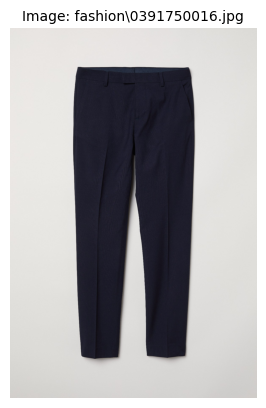

InvalidSchema: No connection adapters were found for 'tobereplaced/computervision/imageanalysis:analyze?api-version=2023-02-01-preview&modelVersion=latest&features=tags,caption'

In [29]:
idx = 1

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

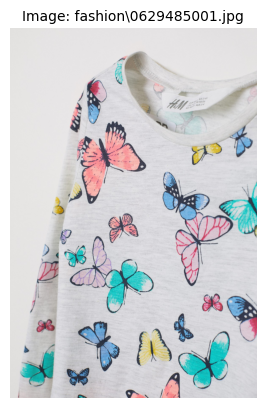

InvalidSchema: No connection adapters were found for 'tobereplaced/computervision/imageanalysis:analyze?api-version=2023-02-01-preview&modelVersion=latest&features=tags,caption'

In [30]:
idx = 500

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

In [ ]:
num_images_per_row = 10
num_images_per_col = 5
img_size = 200
start = 1000

samples = image_files[start : start + (num_images_per_row * num_images_per_col)]

samples_images = Image.new(
    "RGB", (num_images_per_row * img_size, num_images_per_col * img_size)
)

# Load and resize the images
sample_images = [
    Image.open(image_file).resize((img_size, img_size)) for image_file in samples
]

# Paste the images onto the new image
for idx, img in enumerate(sample_images):
    x = (idx % num_images_per_row) * img_size
    y = (idx // num_images_per_row) * img_size
    samples_images.paste(img, (x, y))

samples_images

## Checking images quality

In [ ]:
imagelab = Imagelab(data_path=IMAGES_DIR)

In [ ]:
# Visualize a few images from the dataset with ImageLab

imagelab.visualize(num_images=10)

In [ ]:
imagelab.find_issues()

In [ ]:
imagelab.report()

In [ ]:
imagelab.issue_summary

In [ ]:
imagelab.report(["near_duplicates"])

In [ ]:
imagelab.report(["odd_aspect_ratio"])

In [ ]:
imagelab.report(["exact_duplicates"])

In [ ]:
imagelab.report(["dark"])

In [ ]:
imagelab.report(["low_information"])

In [ ]:
imagelab.report(["light"])

In [ ]:
imagelab.report(["grayscale"])

> In the next notebook we will generate the images vectors embeddings